# Decision Tree

The measurement about the quality of a split is called the **criterion**. There are two measurements commonly used **gini** and **entropy**.

The method to determine how to split or which feature is used to split is based on the **information gain**. The split should give the biggest information gain.

### Example 1: Does John go to play golf given some weather conditions?
This example gives an intuition of how the decision tree use features to make decisions.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons,make_circles
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz

In [3]:
df = pd.read_csv('data/tennis.csv')
df

,Play,Outlook,Humidity,Windy
0,n,rainy,high,n
1,n,rainy,high,y
2,y,sunny,high,n
3,y,sunny,normal,n
4,n,sunny,normal,y
5,n,rainy,high,n


In [4]:
gini_parent = 1 - ((2/6)**2 + (4/6)**2)
print('gini parent = {}'.format(gini_parent))

gini_outlook_child1 = 1 - ((2/3)**2 + (1/3)**2)
gini_outlook_child2 = 1 - ((3/3)**2 + (0/3)**2)
gain_outlook = gini_parent - (3/6)*gini_outlook_child1 - (3/6)*gini_outlook_child2
print('gini outlook = ({},{}), information gain = {}'.format(gini_outlook_child1,gini_outlook_child2,gain_outlook))

gini_humidity_child1 = 1 - ((2/4)**2 + (2/4)**2)
gini_humidity_child2 = 1 - ((0/2)**2 + (2/2)**2)
gain_humidity = gini_parent - (4/6)*gini_humidity_child1 - (2/6)*gini_humidity_child2
print('gini humidity = ({},{}), information gain = {}'.format(gini_humidity_child1,gini_humidity_child2,gain_humidity))

gini_windy_child1 = 1 - ((1/4)**2 + (3/4)**2)
gini_windy_child2 = 1 - ((1/2)**2 + (1/2)**2)
gain_windy = gini_parent - (4/6)*gini_windy_child1 - (2/6)*gini_windy_child2
print('gini windy = ({},{}), information gain = {}'.format(gini_windy_child1,gini_windy_child2,gain_windy))

print('split the parent node given the biggest information gain value, that is fearure Outlook)')


gini parent = 0.4444444444444444
gini outlook = (0.4444444444444444,0.0), information gain = 0.2222222222222222
gini humidity = (0.5,0.0), information gain = 0.1111111111111111
gini windy = (0.375,0.5), information gain = 0.027777777777777762
split the parent node given the biggest information gain value, that is fearure Outlook)


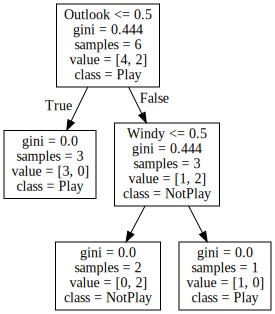

In [5]:
# df['Play'] = df['Play'].map(list(['n','y']).index)
# this is not the best way to encode the features, find out the answer
for feature_name in df.columns[1:]:
    df[feature_name] = df[feature_name].map(list(df[feature_name].unique()).index)
    
clf = DecisionTreeClassifier(criterion='gini')
X = df.iloc[:,1:]
y = df.iloc[:,0]

clf.fit(X,y)

dot_data = export_graphviz(clf, out_file=None,feature_names=df.columns[1:],class_names=['Play','NotPlay']) 
graph = graphviz.Source(dot_data) 
graph

**Feature Importances**

feature_importances_ represents which feature is more efficient to classify the samples. The efficience lies in two ways.
+ how manys nodes use the features to split
+ how much information gain in the split

We can tell which feature provides more information in forming the tree. The higher value means more importance. Specially, more nodes use this feature to split and higher gini values are obtained during the split. 

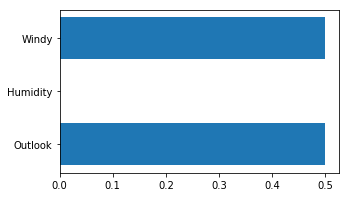

In [6]:
# plot feature importance
plt.figure(figsize=(5,3))
plt.barh(np.arange(3),clf.feature_importances_,tick_label=['Outlook','Humidity','Windy'])
plt.show()

### Example 2: A general classification
This example gives a little bit of intuition on how decision tree works on a classfication problem with two features.

**Tuning Parameters**
+ max_depth: maximum depth of the tree. Too deep trees are fitting the noise.
+ min_samples_leaf: minimum number of samples required to be at a leaf node.
+ min_samples_split: minimum number of samples required to split an internal node. (Not quite understand how this parameter will influence the result. Feel like similar to min_samples_leaf)


In [42]:
df = pd.read_csv('data/binary_nonlinearboundary.txt')
X = df.iloc[:,0:2]
y = df.iloc[:,2]
X1 = X.iloc[:,0];
X2 = X.iloc[:,1];

#X,y = make_moons(n_samples=200,noise=0.2,random_state=0)
#X,y = make_circles(n_samples=500,noise=0.4,factor=0.1,random_state=0)
#X1 = X[:,0]
#X2 = X[:,1]

# build meshgrid
X1_test,X2_test = np.meshgrid(np.linspace(X1.min()-0.2,X1.max()+0.2,100),np.linspace(X2.min()-0.2,X2.max()+0.2,100))
X_test = np.vstack((X1_test.flatten(),X2_test.flatten())).T

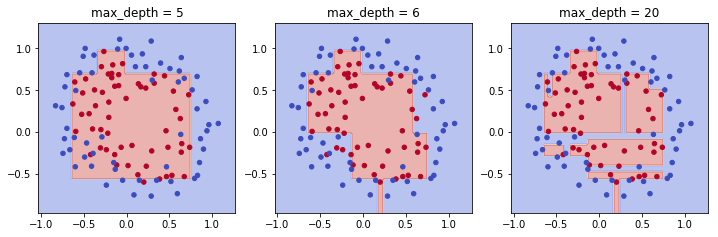

In [66]:
max_depth_range = np.array([5,6,20])
plt.figure(figsize=(12,3.5))
for i in np.arange(3):
    clf = DecisionTreeClassifier(max_depth=max_depth_range[i],min_samples_leaf=1,random_state=0)
    clf.fit(X,y)
    
    y_test = clf.predict(X_test)
    Y_test = y_test.reshape(X1_test.shape)

    plt.subplot(1,3,i+1)
    plt.contourf(X1_test, X2_test, Y_test,cmap=plt.cm.coolwarm,alpha=0.4)
    plt.scatter(X1,X2,c=y,s=20,edgecolor=None,cmap=plt.cm.coolwarm)
    plt.title('max_depth = {}'.format(max_depth_range[i]))
plt.show()

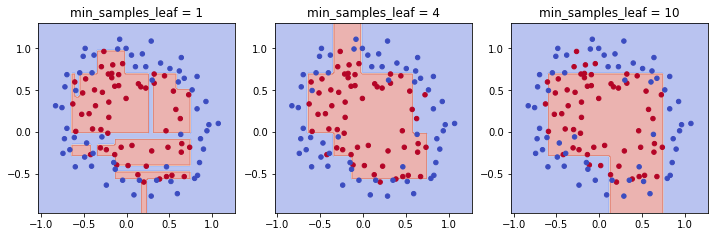

In [68]:
min_samples_leaf_range = np.array([1,4,10])
plt.figure(figsize=(12,3.5))
for i in np.arange(3):
    clf = DecisionTreeClassifier(max_depth=50,min_samples_leaf=min_samples_leaf_range[i],random_state=0)
    clf.fit(X,y)
    
    y_test = clf.predict(X_test)
    Y_test = y_test.reshape(X1_test.shape)

    plt.subplot(1,3,i+1)
    plt.contourf(X1_test, X2_test, Y_test,cmap=plt.cm.coolwarm,alpha=0.4)
    plt.scatter(X1,X2,c=y,s=20,edgecolor=None,cmap=plt.cm.coolwarm)
    plt.title('min_samples_leaf = {}'.format(min_samples_leaf_range[i]))
plt.show()